Solve the 1D Laplacian by FDM.<br>
We want to solve, using Finite Differences, the following problem:
$$
-u'' = g(x), \quad in \Omega = (0, 2\pi),\\
u(0) = u(2\pi) = 0.
$$
with g(x) = sin(x)<br>
The solution is simply u(x) = sin(x)<br>
We'll use a grid of N points with x_0=0, x_{N-1}=2\pi and \Delta x = \frac{2\pi}{N-1}.<br>
In each point of the grid the equation can be discretized as:
$$
-\frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} = g_i,
$$
where g_i = g(x_i)<br>
We keep the boundary points fixed, so we only need to solve for the N-2 interior points. Near the boundaries, our difference is:
$$
-u_2+2u_1=\Delta x^2 g_1,
$$
and
$$
2u_{N-1}-u_{N-2}=\Delta x^2 g_{N-1}.
$$
We can write the system of equation for solving for the N-2 interior points as:
$$
A=\begin{bmatrix}
2 & -1\\
-1 & 2 & -1 \\
 & -1 & 2 & -1 \\
&  & \ddots & \ddots & \ddots & \\
 &  &  & \ddots & \ddots & \ddots\\
& & & & -1 & 2 & -1\\
& & & & & -1 & 2
\end{bmatrix}
$$

$$
u=\begin{bmatrix}
u_1\\
u_2\\
u_3\\
\vdots\\
\vdots\\
u_{N-2}\\
u_{N-1}
\end{bmatrix},
g=\Delta x^2\begin{bmatrix}
g_1\\
g_2\\
g_3\\
\vdots\\
\vdots\\
g_{N-2}\\
g_{N-1}
\end{bmatrix}
$$
Then we just solve Au=g

In [19]:
import numpy as np
d = np.array([2, 2, 2])
l = np.array([-1, -1])
u = l
A = np.diag(d) + np.diag(l, -1) + np.diag(u, 1)
v = np.array([1, 2, 3])
print(A)
np.dot(v,v)
L, _ = np.linalg.eig(A)
L

[[ 2 -1  0]
 [-1  2 -1]
 [ 0 -1  2]]


array([3.41421356, 2.        , 0.58578644])

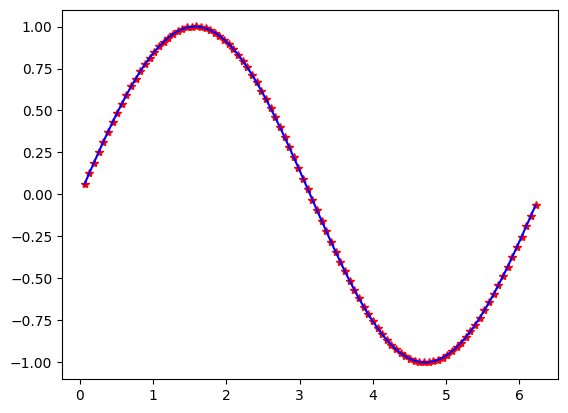

In [20]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.linspace(0.0, 2.0*np.pi, N, endpoint=True)
dx = x[1] - x[0]

g = np.sin(x)

e = np.ones(N-2)
d = 2*e
e1 = -1 * np.ones(N-3)
u=e1
l=e1

A = np.diag(d) + np.diag(u, 1) + np.diag(l, -1)

g = dx**2*g[1:N-1]

u = np.linalg.solve(A, g)

u_ex = np.sin(x[1:N-1])

plt.plot(x[1:N-1], u, 'r*', x[1:N-1], u_ex, 'b')

Build a 10 by 10 matrix where you all 5 on the main diagonal, you have 4 on the first upper diagona, 3 on the second upper diagonal, 2 on the first lower diagonal and -1 on the second lower diagonal.

In [22]:
A = np.diag(5*np.ones(10)) + np.diag(4*np.ones(9), 1) + np.diag(3*np.ones(8), 2) + np.diag(2*np.ones(9), -1) + np.diag(1*np.ones(8), -2)
A

array([[5., 4., 3., 0., 0., 0., 0., 0., 0., 0.],
       [2., 5., 4., 3., 0., 0., 0., 0., 0., 0.],
       [1., 2., 5., 4., 3., 0., 0., 0., 0., 0.],
       [0., 1., 2., 5., 4., 3., 0., 0., 0., 0.],
       [0., 0., 1., 2., 5., 4., 3., 0., 0., 0.],
       [0., 0., 0., 1., 2., 5., 4., 3., 0., 0.],
       [0., 0., 0., 0., 1., 2., 5., 4., 3., 0.],
       [0., 0., 0., 0., 0., 1., 2., 5., 4., 3.],
       [0., 0., 0., 0., 0., 0., 1., 2., 5., 4.],
       [0., 0., 0., 0., 0., 0., 0., 1., 2., 5.]])

Consider the Himmelblau's function given by:
$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$
It has one local maximum at (-0.270845, -0.923039) where f(x,y)=181.617 and four identical local minima:
$$
f(3.0, 2.0)=0.0\\
f(-2.805118, 3.131312)=0.0\\
f(-3.779310, -3.283186)=0.0\\
f(3.584428, -1.848126)=0.0
$$
Plot the function for x in [-5, 5] and y in [-5, 5].

In [24]:
import numpy as np
x = np.arange(0,1.2,0.2)
y=x
[X,Y] = np.meshgrid(x,y)

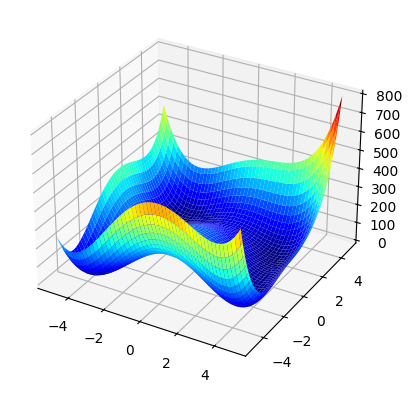

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Himmelblau function
def Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

#Create the vectors for
xaxis = np.arange(-5, 5, 0.1)
yaxis = np.arange(-5, 5, 0.1)

#Create a mesh from the axis
X, Y = np.meshgrid(xaxis, yaxis)

#Compute Z
Z = Himmelblau([X,Y])

#Create a surface plot
fig = plt.figure()
axis = plt.subplot(projection='3d')
axis.plot_surface(X, Y, Z, cmap='jet')

#Show the plot
plt.show()

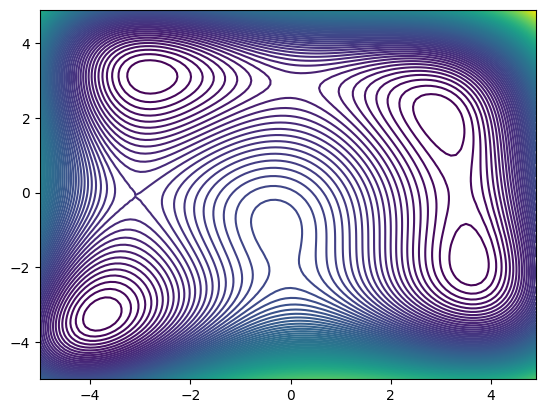

In [29]:
fig = plt.figure()
axis = plt.subplot()
axis.contour(X, Y, Z, 100)

plt.show()

Visualize COVID data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
covid.info() #Shows the information of the dataset
covid.shape() #Shows the first 5 rows
covid.dtypes #Shows the data types of the columns

import matplotlib.dates as mdates
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
covid1.dtypes #Shows the data types of the columns

covid1['Total Confirmed'] = covid1[['Confirmed', 'Recovederd', 'Deaths']].sum(axis=1)
covid1.tail()

#Plotting for worldwide cases
worldwide = covid1.groupby(['Date']).sum()
c=worldwide.plot(figsize=(10,7))
c.set_xlabel('Month')
c.set_ylabel('Number of Cases')
c.title.set_test('Worldwide COVID Insights')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

plt.show()

In [ ]:
Italy = covid1[covid1['Country']=='Italy'].groupby(['Date']).sum()
Italy.tail()

I = Italy.plot(figsize=(10,7))
I.set_xlabel('Month')
I.set_ylabel('Number of Cases')
I.title.set_test('COVID Insights in Italy')

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

In [ ]:
day = '2022-04-16'
last_covid = covid1[covid1['Date']==day]
top_10=last_covid.sort_values(['Confirmed'], ascending=False)[:10]

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')